In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

from hydra import compose, initialize_config_dir
from IPython.display import Image, display
from omegaconf import OmegaConf

from thesis_ml.train import train

In [2]:
# Compose config using Hydra (applies defaults)
config_dir = (Path("../configs")).resolve()
with initialize_config_dir(config_dir=str(config_dir), version_base=None):
    cfg = compose(config_name="config")

print(OmegaConf.to_yaml(cfg))


data:
  n_samples: 5000
  n_features: 16
  train_frac: 0.8
  seed: 42
  task: regression
model:
  hidden_sizes:
  - 64
  - 64
  dropout: 0.0
  activation: relu
trainer:
  epochs: 3
  batch_size: 128
  lr: 0.001
  device: auto
  num_workers: 2
logging:
  save_artifacts: false
  make_plots: true
  show_plots: true
  output_root: outputs
  plots_subdir: ''
  fig_format: png
  use_wandb: false
  wandb:
    project: thesis-ml
    entity: ''
    run_name: ''
    mode: online
    watch_model: false
    log_freq: 100
    log_artifacts: true
    dir: ${logging.output_root}/wandb



In [3]:
# Persist artifacts and show plots
cfg.logging.save_artifacts = True
cfg.logging.make_plots = True
cfg.logging.show_plots = True
cfg.logging.plots_subdir = "plots"  # place plots in a subfolder
cfg.logging.fig_format = "png"
cfg.logging.use_wandb = True

# Keep runs under the repo's outputs directory (relative to this notebook)
cfg.logging.output_root = str((Path("../outputs")).resolve())

# More epochs for a clearer loss curve
cfg.trainer.epochs = 5

print("Will save to:", cfg.logging.output_root)


Will save to: C:\Users\niels\Projects\Thesis-Code\Code\Niels_repo\outputs


c:\Users\niels\mambaforge\Library\envs\thesis-niels_repo\Lib\site-packages\pydantic\_internal\_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
c:\Users\niels\mambaforge\Library\envs\thesis-niels_repo\Lib\site-packages\pydantic\_internal\_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This

Epoch 1: train_loss=16.0252 val_loss=12.5249
Epoch 2: train_loss=7.1367 val_loss=1.5920
Epoch 3: train_loss=0.6703 val_loss=0.3162
Epoch 4: train_loss=0.2518 val_loss=0.1745
Epoch 5: train_loss=0.1515 val_loss=0.1204


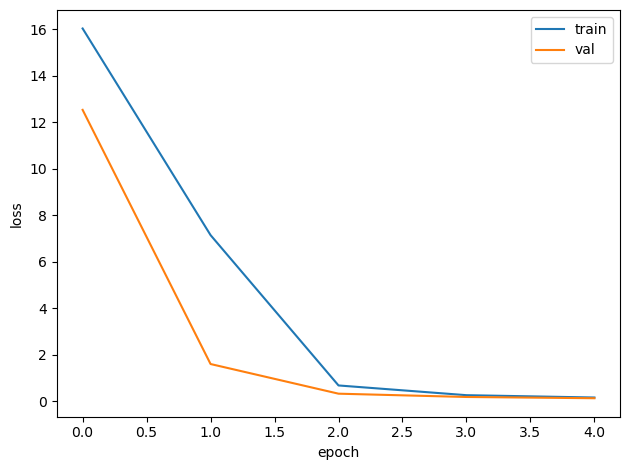

epoch,▁▃▅▆█
train/loss,█▄▁▁▁
val/loss,█▂▁▁▁
epoch,5
train/loss,0.1515
val/loss,0.12044


{'final_train_loss': 0.15149841618537901, 'final_val_loss': 0.12044255989789963, 'task': 'regression', 'device': 'cuda', 'saved_to': 'C:\\Users\\niels\\Projects\\Thesis-Code\\Code\\Niels_repo\\outputs\\20251015-174649'}
Run dir: C:\Users\niels\Projects\Thesis-Code\Code\Niels_repo\outputs\20251015-174649

Artifacts saved:
cfg.yaml
model.pt
plots
plots\loss.png


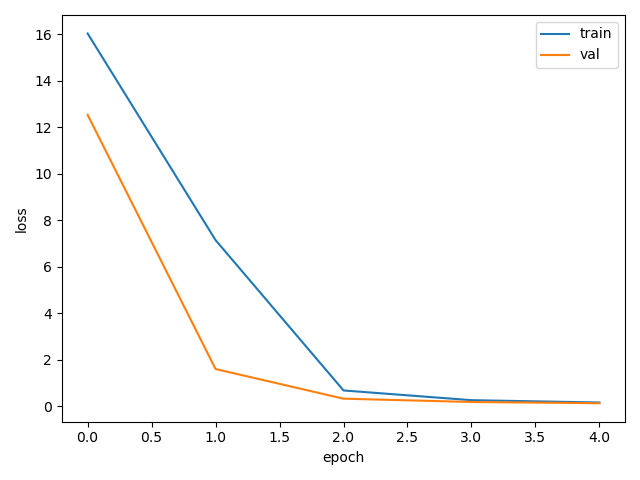

In [4]:

res = train(cfg)
print(res)

run_dir = Path(res["saved_to"]) if res.get("saved_to") else None
print("Run dir:", run_dir)

if run_dir and run_dir.exists():
    print("\nArtifacts saved:")
    for p in sorted(run_dir.rglob("*")):
        print(p.relative_to(run_dir))

    # Show the loss plot
    candidates = [
        run_dir / f"loss.{cfg.logging.fig_format}",
        run_dir / "plots" / f"loss.{cfg.logging.fig_format}",
    ]
    for p in candidates:
        if p.exists():
            display(Image(filename=str(p)))
            break
    else:
        print("No loss plot found")
else:
    print("Artifacts were not persisted (check cfg.logging.save_artifacts)")
